In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG

# You may need to install the Python graphviz library. At the command line:
#   pip install graphviz
# You will also need to install the graphviz executables. You can use apt,
# macports, or other installer for your system.
from graphviz import Source

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank.csv")
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

## Handle Binary Features

In [3]:
df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})

## One Hot Encode and Prepare the data

In [4]:
X = df.drop('deposit', axis=1)  # Drop the target variable to get the features
y = df['deposit']  # Select only the target variable

# Display the original DataFrame
# print("Original DataFrame:")
# print(df.head())
display(X.columns)
display(X.head())

# Perform one-hot encoding on the features
X = pd.get_dummies(X, dtype=int)

# campaign is a categorical variable, so we need to perform one-hot encoding on it
campaign = pd.get_dummies(X.campaign, prefix='campaign', dtype=int)
dropped = X.drop('campaign', axis=1)

# combine the one-hot encoded campaign with the original features
X = pd.concat([dropped, campaign], axis=1)
continuous_features = X[['age','balance', 'day', 'duration', 'pdays']]

for column in continuous_features:
    X[column] = (X[column] - X[column].mean()) / X[column].std()

X.head()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown


,age,default,balance,housing,loan,day,duration,pdays,previous,job_admin.,...,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63
0,1.491438,0,0.252514,1,0,-1.265689,1.930139,-0.481162,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.239620,0,-0.459953,0,0,-1.265689,3.154470,-0.481162,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.019470,0,-0.080157,1,0,-1.265689,2.929770,-0.481162,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.155681,0,0.293749,1,0,-1.265689,0.596339,-0.481162,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.071742,0,-0.416858,0,0,-1.265689,0.867132,-0.481162,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()

In [6]:
print("The features (i.e., the X variable) is now set up", X)
print("The y variable is now set", y)

The features (i.e., the X variable) is now set up             age   default   balance   housing      loan       day  duration  \
0      1.491438 -0.123611  0.252514  1.055232 -0.387906 -1.265689  1.930139   
1      1.239620 -0.123611 -0.459953 -0.947574 -0.387906 -1.265689  3.154470   
2     -0.019470 -0.123611 -0.080157  1.055232 -0.387906 -1.265689  2.929770   
3      1.155681 -0.123611  0.293749  1.055232 -0.387906 -1.265689  0.596339   
4      1.071742 -0.123611 -0.416858 -0.947574 -0.387906 -1.265689  0.867132   
...         ...       ...       ...       ...       ...       ...       ...   
11157 -0.690984 -0.123611 -0.473595  1.055232 -0.387906  0.515627 -0.331272   
11158 -0.187348 -0.123611 -0.246647 -0.947574 -0.387906  0.040610 -0.832527   
11159 -0.774923 -0.123611 -0.464914 -0.947574 -0.387906  0.396873 -0.622230   
11160  0.148409 -0.123611 -0.473905 -0.947574  2.577714 -0.909426 -1.045705   
11161 -0.607045 -0.123611 -0.473905 -0.947574 -0.387906 -0.790671  0.737497   

 

In [7]:
print(X.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'campaign_1', 'campaign_2', 'campaign_3',
       'campaign_4', 'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8',
       'campaign_9', 'campaign_10', 'campaign_11', 'campaign_12',

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

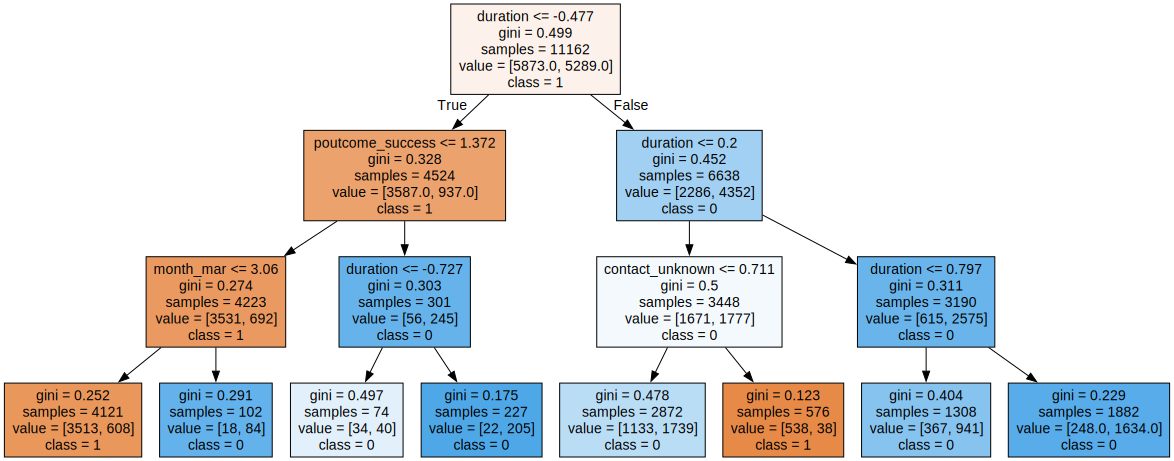

In [9]:
classNames = y.unique().astype(str)
dot = tree.export_graphviz(treeclf, out_file=None,
                           feature_names=X.columns,
                           class_names=classNames, 
                           filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

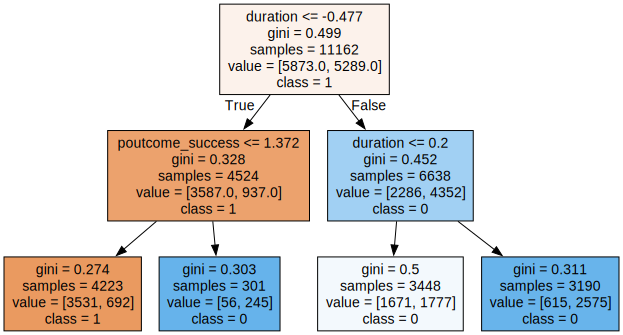

In [10]:
treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
treeclf.fit(X.values, y)
classNames = y.unique().astype(str)
dot = tree.export_graphviz(treeclf, out_file=None,
                           feature_names=X.columns,
                           class_names=classNames, 
                           filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

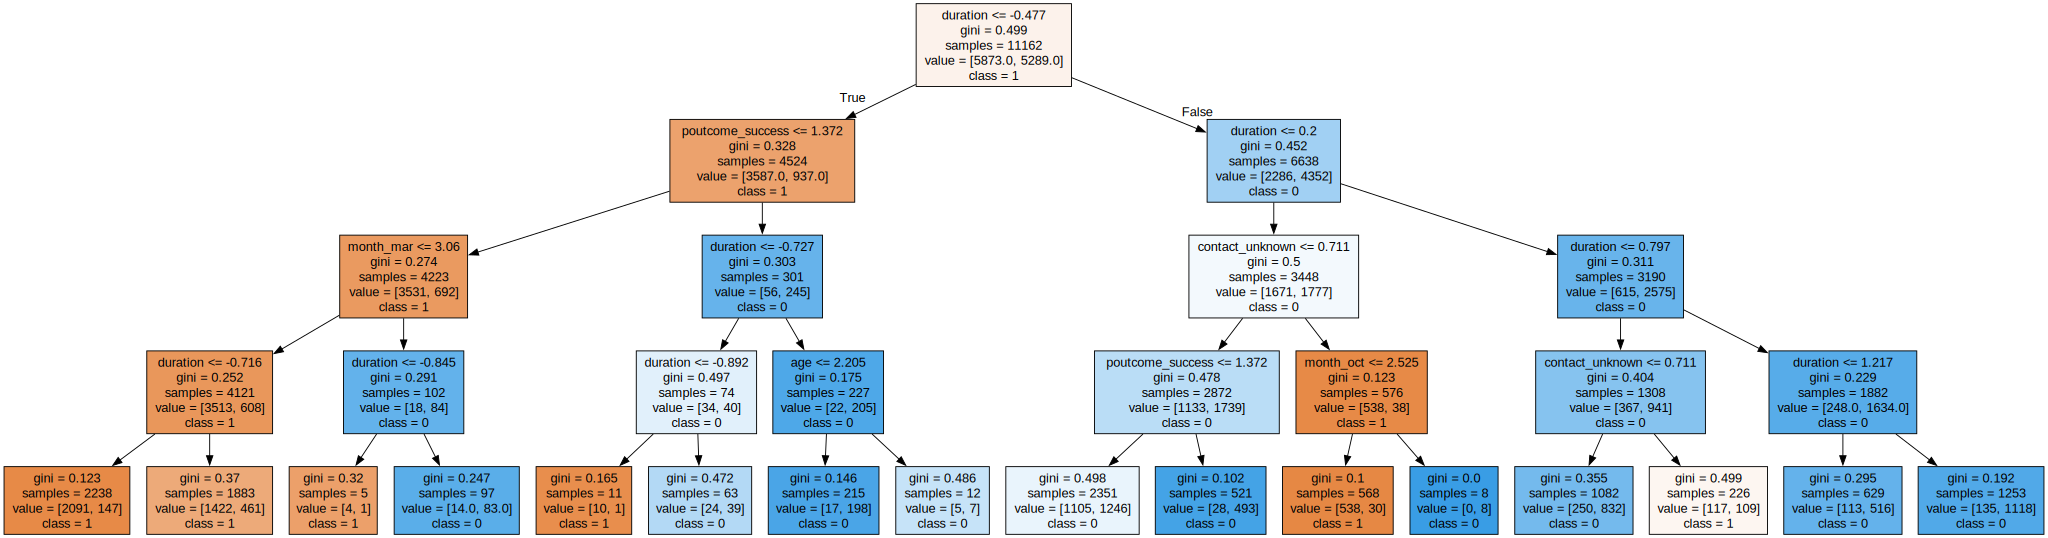

In [11]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X.values, y)
classNames = y.unique().astype(str)
dot = tree.export_graphviz(treeclf, out_file=None,
                           feature_names=X.columns,
                           class_names=classNames, 
                           filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

## Visualize the output

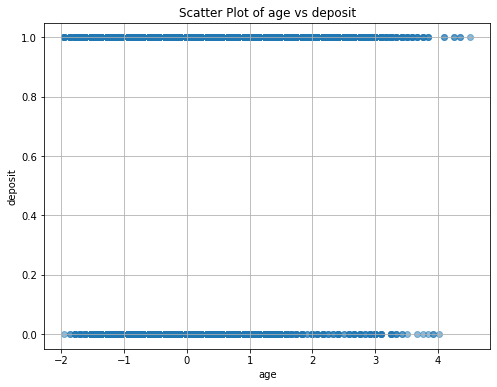

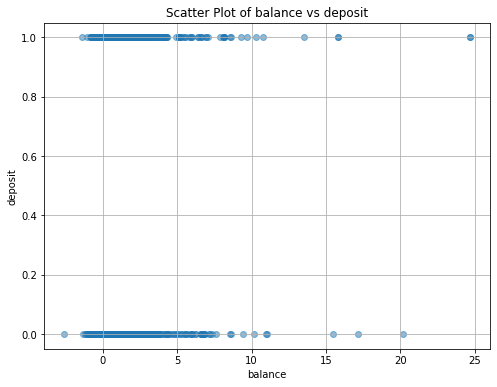

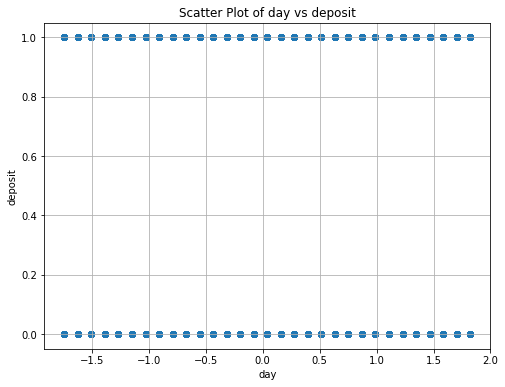

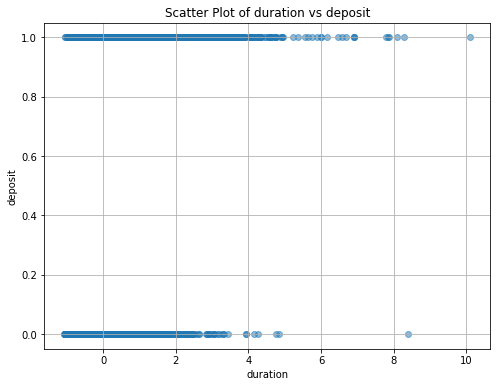

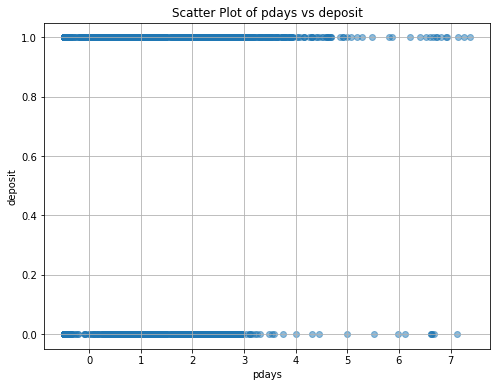

In [12]:
target_variable = 'deposit'
# Plot scatter plots for each continuous feature
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.grid(True)
    plt.show()

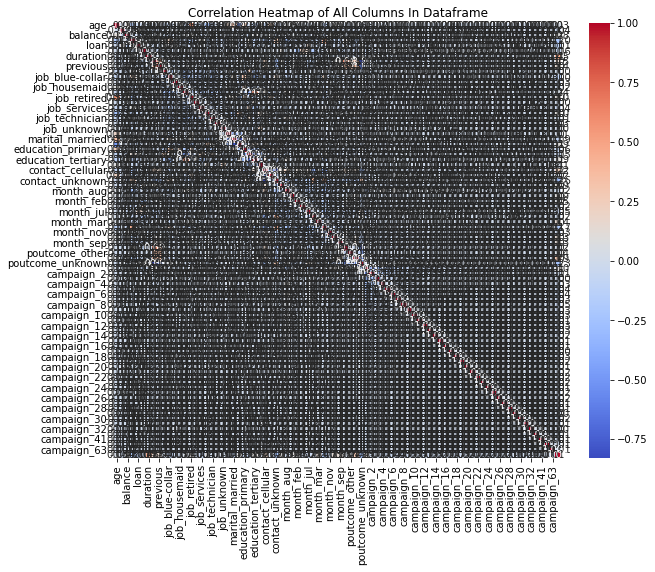

In [13]:
df = pd.concat([X, y], axis=1)
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of All Columns In Dataframe')
plt.show()

## Remove lots of features that aren't in the decision tree to help when I want to regraph the heatmap

In [14]:
# Get a list of column names starting with "campaign_"
campaign_columns = df.filter(regex='^campaign_', axis=1).columns

# Drop the campaign columns from the DataFrame
df = df.drop(campaign_columns, axis=1)

# Get a list of column names starting with "job_"
job_columns = df.filter(regex='^job_', axis=1).columns

# Drop the job columns from the DataFrame
df = df.drop(job_columns, axis=1)

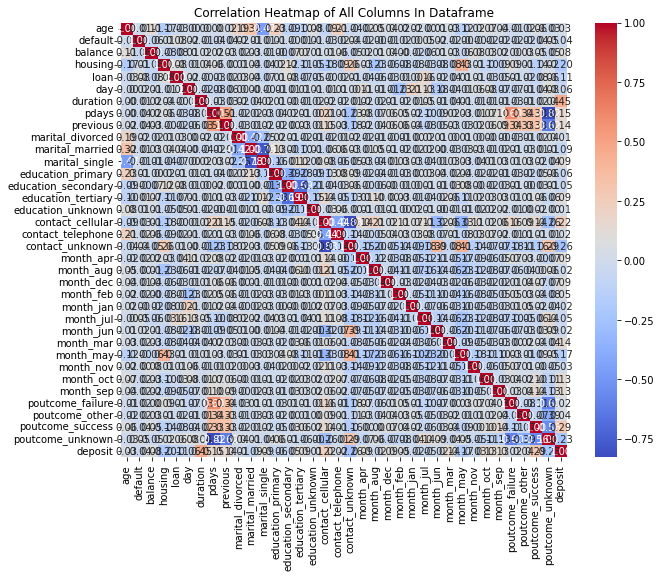

In [15]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of All Columns In Dataframe')
plt.show()

## Make a Heatmap of just the months compared with the target variable

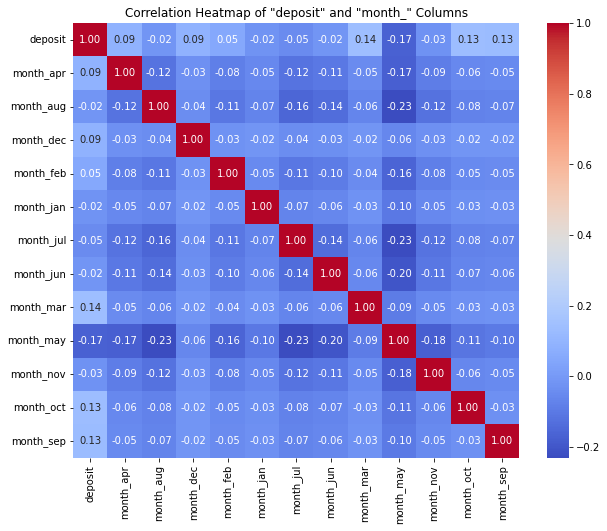

In [16]:
# Get a list of column names starting with "month_"
month_columns = df.filter(regex='^month_', axis=1).columns

# Extract the target variable "deposit" along with the month columns
heatmap_df = df[['deposit'] + list(month_columns)]

# Calculate the correlation matrix
correlation_matrix = heatmap_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of "deposit" and "month_" Columns')
plt.show()

In [17]:
# Get a list of column names starting with "month_"
month_columns = df.filter(regex='^month_', axis=1).columns

# Drop the month columns from the DataFrame
df = df.drop(month_columns, axis=1)

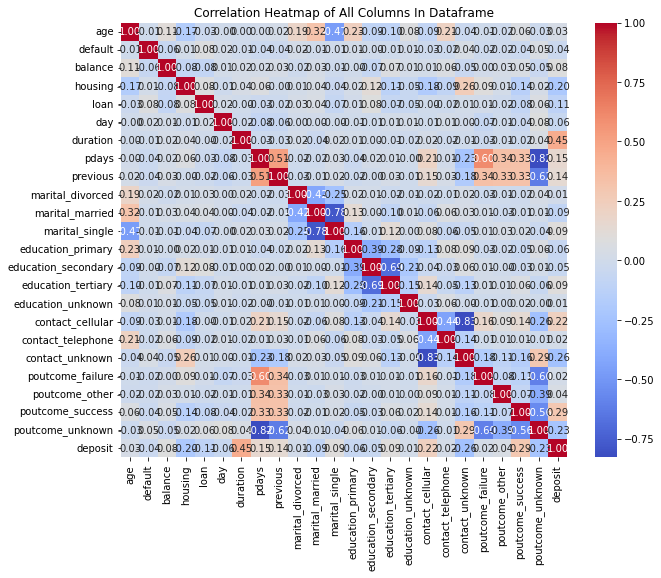

In [18]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of All Columns In Dataframe')
plt.show()